# Project: Insurance Policy Cancellation (CC)
---------------------------------------------

**Challenge:** Using historical policy data, create a multiclass predictive model to predict the policies that are most likely to be canceled and those most likely to be renewed, as well as understand what variables are most influential in causing a policy cancellation.

For this theme, there are true answers, and a team should focus on proposing the best predictive model. The performance of a team will be mainly based on the predictive performance of the propose method measured by accuracy and the quality of the code. You can use Python's weighted F1 score to calculate the performance of for your model on the test partition.
  * Make sure you use the 'weighted' F1 score
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
The Kangaroo data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There were almost 230,000 policies canceled during the effective term. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

Variable descriptions
* id - Policy id (cannot be used in model)
* tenure - Number of years with Kangaroo
* claim.ind - Occurrence of claim (0=no, 1=yes)
* n.adults - Number of adults in the property
* n.children - Number of children in the property
* ni.gender - Gender of policyholder
* ni.marital.status - Marital status of policyholder (0=no, 1=yes)
* premium - Price of the policy
* sales.channel - Medium through which policy was purchased
* coverage.type - Type of coverage
* dwelling.type - Type of dwelling
* len.at.res - Length at residence (how long policyholder lived at property)
* credit - Financial credit level of policyholder
* house.color - Color of house
* ni.age - Age of policholder
* year - Year of the policy
* zip.code - Zip code of the property
* cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel). **This is the response variable.** Dave is deleting the rows where `cancel==-1`!

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
# train
!gdown 1OwtVLopkeGxWMEYkzhFM1-C5hyNnnY39

Downloading...
From: https://drive.google.com/uc?id=1OwtVLopkeGxWMEYkzhFM1-C5hyNnnY39
To: /content/train_df_simple.csv
100% 11.2M/11.2M [00:00<00:00, 96.6MB/s]


In [ ]:
# test
!gdown 1DE_CgigN94XO7ESp1ip0t4Mc2on0r_Rj

Downloading...
From: https://drive.google.com/uc?id=1DE_CgigN94XO7ESp1ip0t4Mc2on0r_Rj
To: /content/test_df.csv
100% 32.2M/32.2M [00:00<00:00, 236MB/s]


# Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work!

🟥 You may use your own local environment, Colab or Databricks to do your modeling, but you must submit your final .ipynb file for grading!

🟥 I expect most of this notebook to be completed with PySpark code with limited `toPandas()` statements - the one exception to this is your model evaluation section where you can convert to pandas so that you can use `sklearn` classification report and confusion matrix if you would like to.

## EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
  * Any team who does not do this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like oversampling, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!

## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.
* Even though this was for text analytics, I thought it was still very well-done, it could be a good resource for you:
  * https://ashokpalivela.medium.com/multi-class-text-classification-using-spark-ml-in-python-b8d2a6545cb

## Interpretability and Discussion (30 points)
Remember - we want to know what is driving cancellations! It's not enough to build an amazing model, you have to inspect it and explain how it made its decision.

* If your best model is a logistic regression, print the coefficients and interpret them!
  * Check the textbook and class materials for a nice example.
* If your best model is a tree-based model, you can get the importances from the PySpark models!
  * https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html
  * https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.RandomForestClassificationModel.html#pyspark.ml.classification.RandomForestClassificationModel.featureImportances
* If you used a different model than a logistic regression or tree-based model, it's up to you to determine to best show how your model made its decision. On your own, you may want to consider partial dependence (ask Dave for help early if you want to do this):
  * https://gist.github.com/eddjberry/43ceca3d29905781ab6c8dab07e8e1da
*  Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.
  * We are looking for each team to provide a business recommendation based on the results of your model! We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 80 to a 100 based on model F1 score for the TEST PARTITION (you can use the `F1 score` function from sci-kit learn to evaluate the final model.)
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade.
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.


In [ ]:
# these are the results dave got from a very simple model - you should be able to
# beat these results with some fine-tuning!

              precision    recall  f1-score   support

     class 0       0.92      0.96      0.94    584564
     class 1       0.82      0.78      0.80     59434
     class 2       0.85      0.75      0.79    180612

    accuracy                           0.90    824610
   macro avg       0.86      0.83      0.84    824610
weighted avg       0.90      0.90      0.90    824610

              precision    recall  f1-score   support

     class 0       0.77      0.79      0.78    146274
     class 1       0.40      0.38      0.39     14806
     class 2       0.33      0.31      0.32     45073

    accuracy                           0.65    206153
   macro avg       0.50      0.49      0.50    206153
weighted avg       0.65      0.65      0.65    206153



Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!

# Importing Libraries

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=fa44f17d594659f4c5c1ac586a8d8f8ee022427338c8d91924b6eec2f2fa9585
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Insurance_Project")\
        .getOrCreate()

In [ ]:
from pyspark.sql.utils import AnalysisException
import pyspark.sql.functions as F
import pyspark.sql.types as T
from functools import reduce

In [ ]:
from pyspark.sql.window import Window

In [ ]:
import pandas as pd

In [ ]:
#import pipeline
from pyspark.ml import Pipeline

#import  pyspark.ml.feature
#contains Imputer,VectorAssembler,MinMaxScaler
import pyspark.ml.feature as MF

# Data Cleaning and Feature Engineering

In [ ]:
#read train csv file in pyspark
train_df = spark.read.csv("/content/train_df_simple.csv", inferSchema=True, header=True)

In [ ]:
test_df = spark.read.csv("/content/test_df.csv", inferSchema=True, header=True)

## Handling Null Values

In [ ]:
train_df.columns

['id',
 'year',
 'zip.code',
 'house.color',
 'ni.age',
 'len.at.res',
 'credit',
 'coverage.type',
 'dwelling.type',
 'premium',
 'sales.channel',
 'ni.gender',
 'ni.marital.status',
 'n.adults',
 'n.children',
 'tenure',
 'claim.ind',
 'cancel']

**Replacing dots in column names with underscores:**
In PySpark, it is a common best practice to replace dots in column names with underscores. This is because PySpark follows the Java Virtual Machine naming convention for variables and methods, which does not allow for dots in their names. By replacing dots with underscores, we can avoid potential errors and ensure that our code runs smoothly. Below, we are defining a function to replace dots with underscores.

In [ ]:
def replace_dots_with_underscores(df):
    new_column_names = [col.replace(".", "_") for col in df.columns]
    renamed_df = df.toDF(*new_column_names)
    return renamed_df

In [ ]:
train_df = replace_dots_with_underscores(train_df)

In [ ]:
# Checking datatypes of each column
train_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- zip_code: double (nullable = true)
 |-- house_color: string (nullable = true)
 |-- ni_age: double (nullable = true)
 |-- len_at_res: double (nullable = true)
 |-- credit: string (nullable = true)
 |-- coverage_type: string (nullable = true)
 |-- dwelling_type: string (nullable = true)
 |-- premium: double (nullable = true)
 |-- sales_channel: string (nullable = true)
 |-- ni_gender: string (nullable = true)
 |-- ni_marital_status: double (nullable = true)
 |-- n_adults: double (nullable = true)
 |-- n_children: double (nullable = true)
 |-- tenure: double (nullable = true)
 |-- claim_ind: double (nullable = true)
 |-- cancel: integer (nullable = true)



In [ ]:
train_df.show()

+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+
|     id|year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|          premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|
+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+
| 688609|2016| 50001.0|      white|  44.0|      25.0|  high|            A|        Condo|      950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|     0|
| 308155|2015| 50048.0|     yellow|  31.0|      22.0|  high|            B|       Tenant|      1003.420558|       Broker|        M|              0.0|     2.0|       0.0|   8.0|      1.0|     0|
| 240486|2015| 98034.0|      white|

In [ ]:
# count null values in each column
train_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in train_df.columns]).show()

+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+
| id|year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|
+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+
|  0|   0|     121|        109|   133|       113|   102|          138|          128|    102|          118|      123|              118|      92|        96|   124|      128|     0|
+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+



**Null Value Replacement Strategy for Zip Codes:** We see that in the Zip Code column, we have fewer than 0.001% nulls. Therefore, we are replacing the null values with a fixed value of 999.

In [ ]:
# Filling all null values in zip_code with '999'
train_df = train_df.na.fill({'zip_code': 999})

**Null Value Replacement Strategy for Categorical Features:** Since string columns have discrete values, replacing null values with the most frequent value (mode) ensures that the overall distribution of the column is preserved.

In [ ]:
# Defining a function to fill null values in string columns with the mode
def impute_string_cols_with_mode(df, string_cols):
    for col_name in string_cols:
        mode_value = df.select(F.mode(F.col(col_name))).collect()[0][0]
        df = df.na.fill({col_name: mode_value})
    return df

In [ ]:
string_cols = ['house_color', 'dwelling_type', 'credit', 'ni_gender', 'coverage_type', 'sales_channel']

In [ ]:
train_df = impute_string_cols_with_mode(train_df, string_cols)

**Null Value Replacement Strategy for Discrete Features:** We are replacing null values in discrete numeric columns with median because median is a robust measure of central tendency that is less sensitive to outliers compared to mean. Replacing null values with median ensures that the imputed values are representative of the typical values in the column and maintains the distribution of the data.

We did not use Imputer beacuse we wanted to change the column values in place.

In [ ]:
def impute_nulls_with_median(df, cols):
    # creating a dictionary to hold median values for each column
    median_values = {}

    for col_name in cols:
        median_value = df.approxQuantile(col_name, [0.5], 0.001)[0]
        median_values[col_name] = median_value

    # replace null values with the median for each column
    for col_name in cols:
        df = df.withColumn(col_name, F.when(F.col(col_name).isNull(), median_values[col_name]).otherwise(F.col(col_name)))

    return df

In [ ]:
discrete_cols = ['ni_age', 'len_at_res', 'n_adults', 'n_children', 'tenure', 'claim_ind', 'ni_marital_status']
train_df = impute_nulls_with_median(train_df, discrete_cols)

**Null Value Replacement Strategy for Continuous Features:** Premium column null values have been replaced by the mean.

In [ ]:
train_df = train_df.withColumn("premium", F.when(F.col("premium").isNull(), F.mean(F.col("premium")).over(Window.partitionBy())).otherwise(F.col("premium")))

In [ ]:
# Checking if all null values have been resolved
train_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in train_df.columns]).show()

+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+
| id|year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|
+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+
|  0|   0|       0|          0|     0|         0|     0|            0|            0|      0|            0|        0|                0|       0|         0|     0|        0|     0|
+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+



##Exoploratory Data Analysis

Below is the  histogram of the "premium" column in the train_df DataFrame and overlays a normal curve based on the mean and standard deviation of the column. The histogram and normal curve have similar shapes, suggesting that the data is approximately normally distributed.

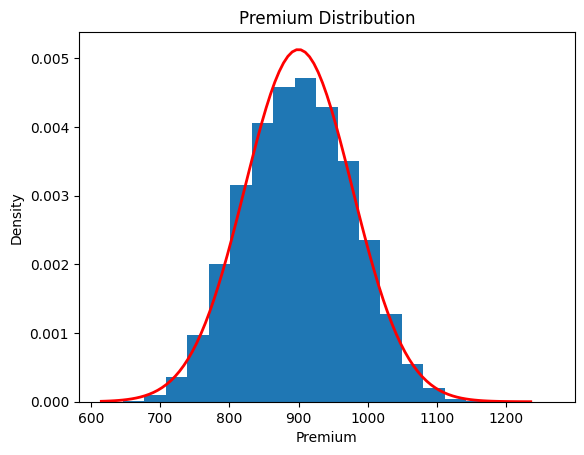

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Calculating mean and standard deviation of premium
mean_val = train_df.select(F.mean(F.col("premium"))).collect()[0][0]
stddev_val = train_df.select(F.stddev(F.col("premium"))).collect()[0][0]

num_bins = 20
bin_width = (train_df.selectExpr("max(premium) - min(premium)")).collect()[0][0] / num_bins
bins = np.arange(train_df.selectExpr("min(premium)").collect()[0][0], train_df.selectExpr("max(premium)").collect()[0][0] + bin_width, bin_width)

# Histogram
fig, ax = plt.subplots()
ax.hist(train_df.select("premium").rdd.flatMap(lambda x: x).collect(), bins=bins, density=True)

# Normal curve
x = np.linspace(train_df.selectExpr("min(premium)").collect()[0][0], train_df.selectExpr("max(premium)").collect()[0][0], 100)
ax.plot(x, 1/(stddev_val * np.sqrt(2 * np.pi)) * np.exp(- (x - mean_val)**2 / (2 * stddev_val**2)), linewidth=2, color='r')

ax.set_xlabel("Premium")
ax.set_ylabel("Density")
ax.set_title("Premium Distribution")
plt.show()


Creating Box Plots of all Numeric Columns to check their distribution

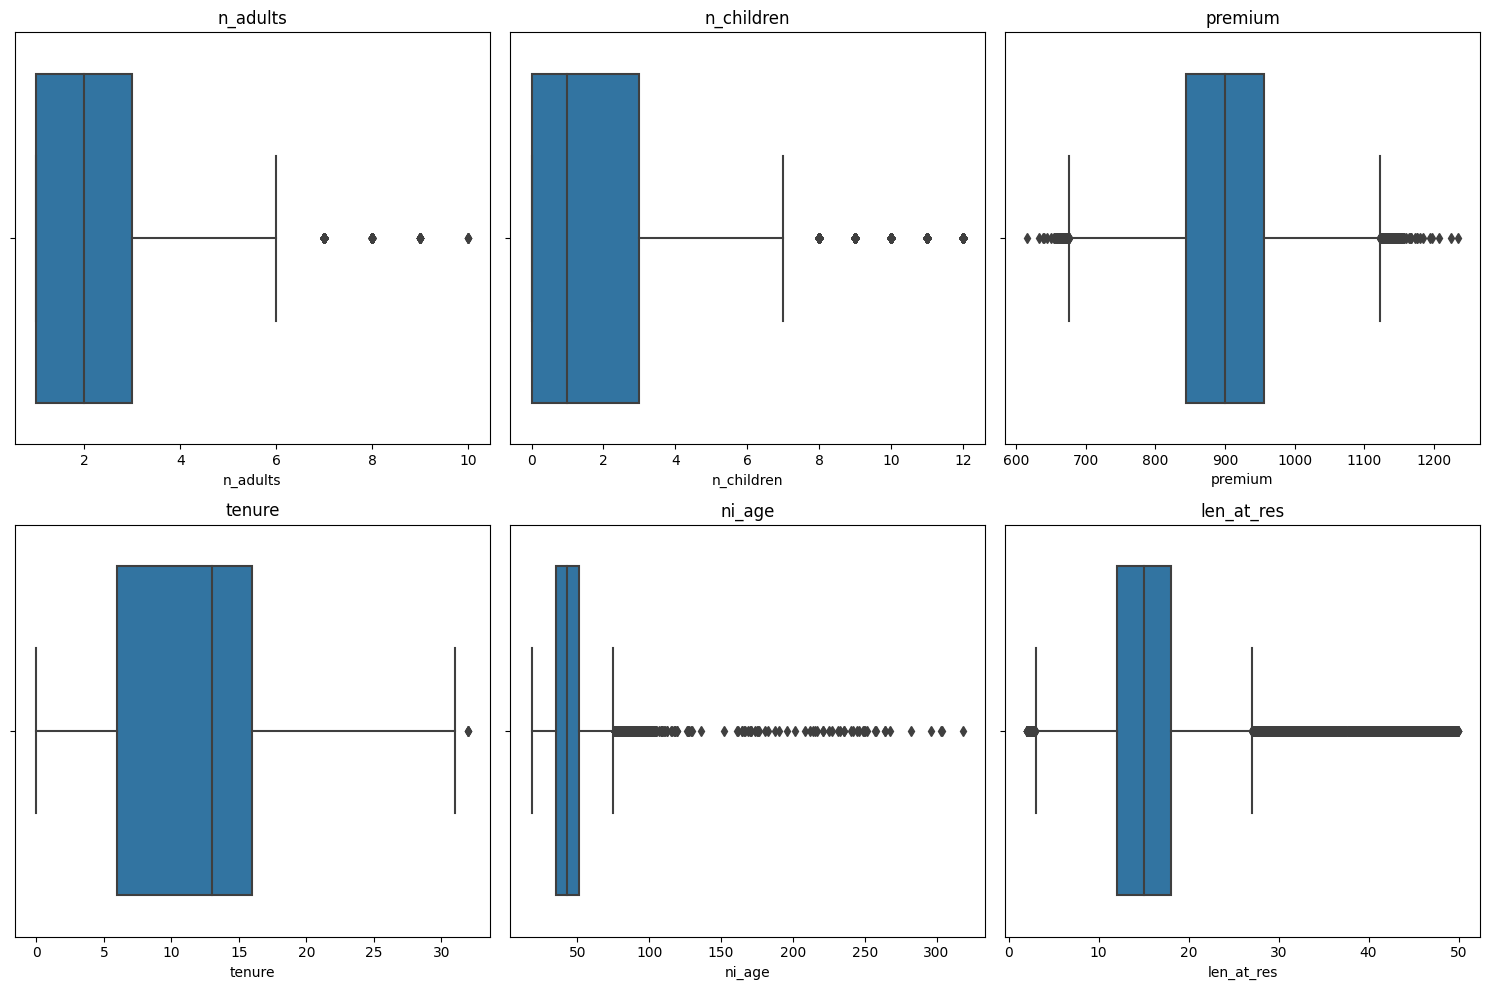

In [ ]:
# Creating box plots for every numeric column
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

columns = ['n_adults', 'n_children', 'premium', 'tenure', 'ni_age', 'len_at_res']

# Looping through each column and create a boxplot in the appropriate subplot
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=column, data=train_df.toPandas(), ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()

plt.show()


We see that ni_age and len_at_res have outliers. Below we are checking several percentile values for these columns and forming an imputation strategy for outliers.

In [ ]:
col_name = "ni_age"

df_cast = train_df.selectExpr(f"cast({col_name} as double) as {col_name}")

percentiles = [0.0, 0.1, 0.15, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
ni_age_percentiles = df_cast.approxQuantile(col_name, percentiles, 0.01)

print("ni_age percentiles:")
for p, percentile in zip(percentiles, ni_age_percentiles):
    print("{}th percentile: {}".format(p * 100, percentile))

ni_age percentiles:
0.0th percentile: 18.0
10.0th percentile: 29.0
15.0th percentile: 31.0
25.0th percentile: 35.0
50.0th percentile: 43.0
75.0th percentile: 51.0
85.0th percentile: 55.0
90.0th percentile: 58.0
95.0th percentile: 63.0
96.0th percentile: 65.0
97.0th percentile: 66.0
98.0th percentile: 68.0
99.0th percentile: 318.6773963
100.0th percentile: 318.6773963


In [ ]:
# imputing values above the 98th percentile with the 98th percentile value itself
train_df = train_df.withColumn("ni_age_imputed", F.when(train_df["ni_age"] > 68, 68).otherwise(train_df["ni_age"]))


<Axes: xlabel='ni_age_imputed'>

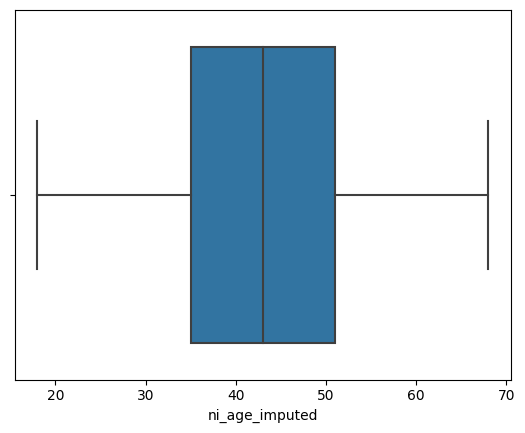

In [ ]:
sns.boxplot(x="ni_age_imputed", data=train_df.select("ni_age_imputed").toPandas())

The box plot after outlier imputation looks much better. Following the same procedure for len_at_res below.

In [ ]:
col_name = "len_at_res"

df_cast = train_df.selectExpr(f"cast({col_name} as double) as {col_name}")

percentiles = [0.0, 0.1, 0.15, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
ni_age_percentiles = df_cast.approxQuantile(col_name, percentiles, 0.01)

print("len_at_res percentiles:")
for p, percentile in zip(percentiles, ni_age_percentiles):
    print("{}th percentile: {}".format(p * 100, percentile))

len_at_res percentiles:
0.0th percentile: 2.0
10.0th percentile: 10.0
15.0th percentile: 11.0
25.0th percentile: 12.0
50.0th percentile: 15.0
75.0th percentile: 18.0
85.0th percentile: 19.0
90.0th percentile: 20.0
95.0th percentile: 22.0
96.0th percentile: 22.0
97.0th percentile: 23.0
98.0th percentile: 24.0
99.0th percentile: 49.98815525
100.0th percentile: 49.98815525


In [ ]:
train_df = train_df.withColumn("len_at_res_imputed", F.when(train_df["len_at_res"] > 24, 24).otherwise(train_df["len_at_res"]))

<Axes: xlabel='len_at_res_imputed'>

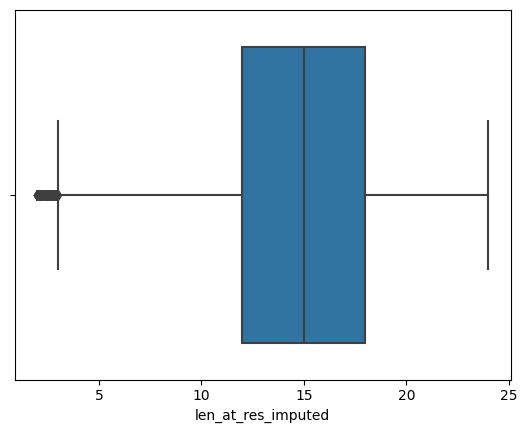

In [ ]:
sns.boxplot(x="len_at_res_imputed", data=train_df.select("len_at_res_imputed").toPandas())

We are now creating bar graphs to check the distribution of all string columns.

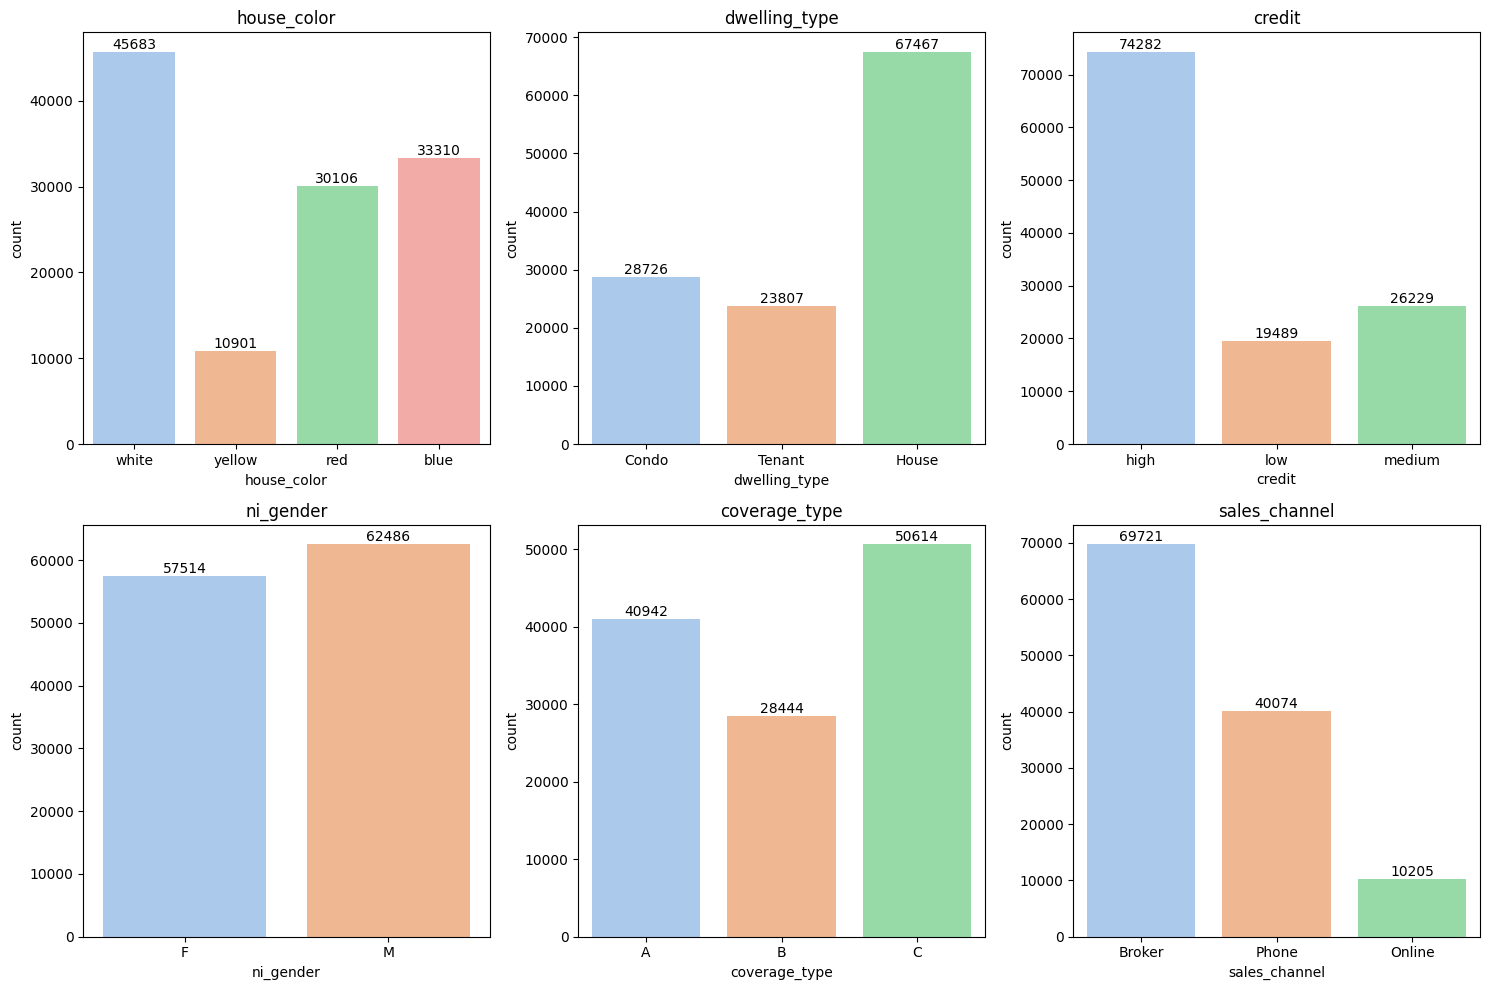

In [ ]:
# Creating bar plots for all string columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(string_cols):
    row = i // 3
    col = i % 3
    sns.countplot(x=column, data=train_df.toPandas(), ax=axes[row, col], palette="pastel")
    axes[row, col].set_title(column)
    # Adding data labels to the bars
    for bar in axes[row, col].patches:
        axes[row, col].annotate(format(bar.get_height(), '.0f'),
                                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.show()

From the bar graphs above, we see that the gender distribution is approximately even. Broker, House, High seem to be the most frequently occuring sales channel, dwelling type and credit respectively.

<ipython-input-85-3f2e3fc0996c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.toPandas().corr(), cmap='coolwarm')


<Axes: >

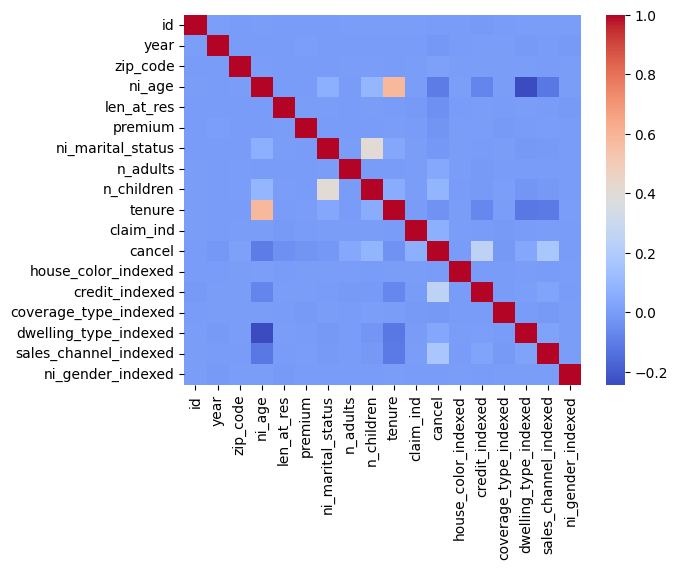

In [ ]:
sns.heatmap(train_df.toPandas().corr(), cmap='coolwarm')

The Correlation Heatmap does not show any significant correlations between variables. It is good to see that the target variable 'cancel' is not correlated with any feature.

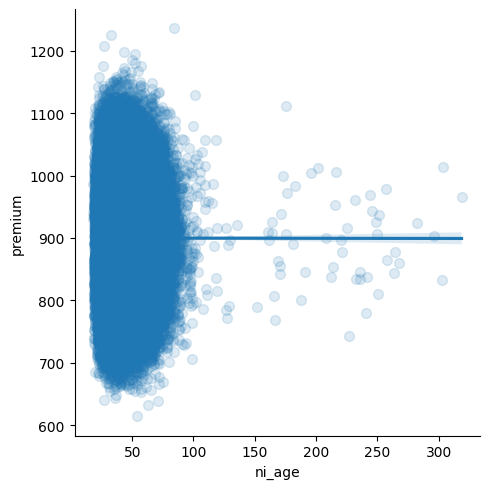

In [ ]:
scatter_kws = {'s': 50, 'alpha': 0.15}

# Create the lmplot with custom scatter parameters
sns.lmplot(x='ni_age', y='premium', data=train_df.toPandas(), scatter_kws=scatter_kws )

plt.show()

The scatter plot shows the premium is much more widely distributed than age. In the transformations below, we have normalized the premium column to prevent it from dominating our model.

##Transformations on Test Dataframe

In [ ]:
# Now perforimg the same transformations of test_df that we did on train_df
test_df = replace_dots_with_underscores(test_df)

In [ ]:
# Checking the test dataframe for nulls
test_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in test_df.columns]).show()

+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+
| id|year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|
+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+
|  0|   0|     313|        319|   293|       295|   289|          316|          339|    331|          324|      314|              345|     323|       319|   323|      324|     0|
+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+



In [ ]:
# Filling all null values in zip_code with '999'
test_df = test_df.na.fill({'zip_code': 999})
# Imputing string cols with mode
test_df = impute_string_cols_with_mode(test_df, string_cols)
# Imputing discrete cols with median
test_df = impute_nulls_with_median(test_df, discrete_cols)
# Imputing premium col with mean
test_df = test_df.withColumn("premium", F.when(F.col("premium").isNull(), F.mean(F.col("premium")).over(Window.partitionBy())).otherwise(F.col("premium")))

In [ ]:
# Checking the test dataframe for nulls again
test_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in test_df.columns]).show()

+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+
| id|year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|
+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+
|  0|   0|       0|          0|     0|         0|     0|            0|            0|      0|            0|        0|                0|       0|         0|     0|        0|     0|
+---+----+--------+-----------+------+----------+------+-------------+-------------+-------+-------------+---------+-----------------+--------+----------+------+---------+------+



In [ ]:
# imputing values above the 98th percentile with the 98th percentile value itself
test_df = test_df.withColumn("ni_age_imputed", F.when(test_df["ni_age"] > 68, 68).otherwise(test_df["ni_age"]))

test_df = test_df.withColumn("len_at_res_imputed", F.when(test_df["len_at_res"] > 24, 24).otherwise(test_df["len_at_res"]))

In [ ]:
# #Treating zipcode and year as categorical variables
# test_df = change_datatype_to_string(test_df, ["year", "zip_code"])
test_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- zip_code: double (nullable = false)
 |-- house_color: string (nullable = false)
 |-- ni_age: double (nullable = true)
 |-- len_at_res: double (nullable = true)
 |-- credit: string (nullable = false)
 |-- coverage_type: string (nullable = false)
 |-- dwelling_type: string (nullable = false)
 |-- premium: double (nullable = true)
 |-- sales_channel: string (nullable = false)
 |-- ni_gender: string (nullable = false)
 |-- ni_marital_status: double (nullable = true)
 |-- n_adults: double (nullable = true)
 |-- n_children: double (nullable = true)
 |-- tenure: double (nullable = true)
 |-- claim_ind: double (nullable = true)
 |-- cancel: integer (nullable = true)
 |-- house_color_indexed: double (nullable = false)
 |-- credit_indexed: double (nullable = false)
 |-- coverage_type_indexed: double (nullable = false)
 |-- dwelling_type_indexed: double (nullable = false)
 |-- sales_channel_indexed: double (nullable

##Feature Engineering

- Using string indexer on string columns
- Using normalizer on numeric columns
- Combining all transformed vectors into one dense vector using vector assembler

In [ ]:
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol=col, outputCol=col+"_indexed").fit(train_df) for col in string_cols]

for indexer in indexers:
    train_df = indexer.transform(train_df)
    test_df = indexer.transform(test_df)


In [ ]:
from pyspark.ml.feature import VectorAssembler, Normalizer

# Define numeric columns to normalize
numeric_cols = ['n_adults', 'n_children', 'premium', 'tenure', 'ni_age_imputed', 'len_at_res_imputed']

# Vector Assembler for numeric columns
assembler = VectorAssembler(inputCols=numeric_cols, outputCol='num_features')
train_df = assembler.transform(train_df)
test_df = assembler.transform(test_df)

# Normalizing numeric columns
normalizer = Normalizer(inputCol='num_features', outputCol='norm_features')
train_df = normalizer.transform(train_df)
test_df = normalizer.transform(test_df)

# Combine numeric and input columns using Vector Assembler
input_cols = [ 'year', 'zip_code', 'ni_marital_status', 'claim_ind', 'house_color_indexed', 'credit_indexed',
               'coverage_type_indexed', 'dwelling_type_indexed', 'sales_channel_indexed', 'ni_gender_indexed']
assembler = VectorAssembler(inputCols=['norm_features'] + input_cols, outputCol='features')
train_df_assembled = assembler.transform(train_df)
test_df_ = assembler.transform(test_df)


In [ ]:
train_df.show(truncate=False)

+-------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+--------------+------------------+-------------------+--------------+---------------------+---------------------+---------------------+-----------------+------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id     |year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|premium          |sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|ni_age_imputed|len_at_res_imputed|house_color_indexed|credit_indexed|coverage_type_indexed|dwelling_type_indexed|sal

#Modeling

## Multinomial Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

input_col = "features"
output_col = "cancel"

lr = LogisticRegression(labelCol=output_col, featuresCol=input_col)
lr_model = lr.fit(train_df)

# Retrieving the coefficients and intercepts from the trained logistic regression model
coefficients = lr_model.coefficientMatrix.toArray()
intercepts = lr_model.interceptVector.toArray()

print("Coefficients:", coefficients)
print("Intercepts:", intercepts)

lr_train_predictions = lr_model.transform(train_df)
lr_test_predictions = lr_model.transform(test_df)

# Evaluating model performance
evaluator = MulticlassClassificationEvaluator(labelCol=output_col, metricName="accuracy")
lr_train_accuracy = evaluator.evaluate(lr_train_predictions)
lr_test_accuracy = evaluator.evaluate(lr_test_predictions)

print('Logistic Regression Train Accuracy:', lr_train_accuracy)
print('Logistic Regression Test Accuracy:', lr_test_accuracy)


Coefficients: [[-5.11571318e+01 -7.55666589e+01 -1.47690506e+02 -2.28882534e+01
   8.36535718e+00  8.63948762e+00  3.56565193e-02 -1.89081124e-06
   2.54943527e-01 -2.89396062e-01  1.95326911e-03 -4.88551274e-01
   2.54056736e-02 -2.86817266e-02 -4.16550676e-01  1.86220926e-02]
 [ 1.13191711e+01  3.01370511e+01  1.69018296e+02  1.57991648e+01
  -2.05290119e+00 -5.34332865e+00 -2.60113531e-02  2.76615321e-06
  -1.35909683e-01  1.58049000e-01  7.19677074e-03  2.41496516e-01
  -1.35544186e-02  1.39397463e-02  2.47676030e-01 -1.48124674e-02]
 [ 3.98379607e+01  4.54296078e+01 -2.13277902e+01  7.08908863e+00
  -6.31245599e+00 -3.29615897e+00 -9.64516626e-03 -8.75341971e-07
  -1.19033844e-01  1.31347062e-01 -9.15003985e-03  2.47054758e-01
  -1.18512550e-02  1.47419803e-02  1.68874646e-01 -3.80962522e-03]]
Intercepts: [  77.34393725 -118.0090457    40.66510846]
Logistic Regression Train Accuracy: 0.719875
Logistic Regression Test Accuracy: 0.7175455433745734


# Interpretting the Model

In [ ]:
from sklearn.metrics import classification_report

# Extract the predictions and actual values for the test set from the logistic regression model
y_pred_lr = [p.prediction for p in lr_test_predictions.select("prediction").collect()]
y_actual_lr = [p.cancel for p in lr_test_predictions.select("cancel").collect()]

# Extract the predictions and actual values for the train set from the logistic regression model
y_pred_lr_tr = [p.prediction for p in lr_train_predictions.select("prediction").collect()]
y_actual_lr_tr = [p.cancel for p in lr_train_predictions.select("cancel").collect()]

# Print the classification report for the logistic regression model on the test set
print('Logistic Regression Test Classification Report:\n', classification_report(y_actual_lr, y_pred_lr, target_names=["class 0","class 1","class 2"], zero_division=0))

# Print the classification report for the logistic regression model on the train set
print('Logistic Regression Train Classification Report:\n', classification_report(y_actual_lr_tr, y_pred_lr_tr, target_names=["class 0","class 1","class 2"], zero_division=0))


Logistic Regression Test Classification Report:
               precision    recall  f1-score   support

     class 0       0.73      0.96      0.83    244522
     class 1       0.00      0.00      0.00     24772
     class 2       0.54      0.18      0.27     75597

    accuracy                           0.72    344891
   macro avg       0.42      0.38      0.37    344891
weighted avg       0.64      0.72      0.65    344891

Logistic Regression Train Classification Report:
               precision    recall  f1-score   support

     class 0       0.73      0.96      0.83     85143
     class 1       0.00      0.00      0.00      8630
     class 2       0.55      0.18      0.28     26227

    accuracy                           0.72    120000
   macro avg       0.43      0.38      0.37    120000
weighted avg       0.64      0.72      0.65    120000



Based on the classification report, the model has an overall accuracy of 0.72. The precision for class 0 (not cancel) is relatively high at 0.73, indicating that the model is good at identifying policies that are not likely to be cancelled. However, the precision for class 1 (may cancel but can be convinced) is 0.00, indicating that the model does not perform well at identifying policies that may cancel but can be convinced to stay. The precision for class 2 (cancel) is 0.54, indicating that the model is fairly good at identifying policies that are likely to be cancelled. The recall for class 2 is relatively low at 0.18, indicating that the model misses many of the policies that are actually likely to be cancelled. The f1-score for class 2 is 0.27, which is also relatively low. We feel this may be because the ataset is a subset of a larger data pool. It therefore is imabalanced and lacks class 1 observations.

Also looking at the intercepts from the above code, we can infer that when all the predictors are zero, the model predicts that the response variable will be in class 0 with log-odds equal to 77.34, in class 1 with log-odds equal to -118.01, and in class 2 with log-odds equal to 40.67.

In [ ]:
# Coefficient matrix of the logistic regression model
coefficients = lr_model.coefficientMatrix.toArray()

print("Coefficients:\n", coefficients)


Coefficients:
 [[-5.11571318e+01 -7.55666589e+01 -1.47690506e+02 -2.28882534e+01
   8.36535718e+00  8.63948762e+00  3.56565193e-02 -1.89081124e-06
   2.54943527e-01 -2.89396062e-01  1.95326911e-03 -4.88551274e-01
   2.54056736e-02 -2.86817266e-02 -4.16550676e-01  1.86220926e-02]
 [ 1.13191711e+01  3.01370511e+01  1.69018296e+02  1.57991648e+01
  -2.05290119e+00 -5.34332865e+00 -2.60113531e-02  2.76615321e-06
  -1.35909683e-01  1.58049000e-01  7.19677074e-03  2.41496516e-01
  -1.35544186e-02  1.39397463e-02  2.47676030e-01 -1.48124674e-02]
 [ 3.98379607e+01  4.54296078e+01 -2.13277902e+01  7.08908863e+00
  -6.31245599e+00 -3.29615897e+00 -9.64516626e-03 -8.75341971e-07
  -1.19033844e-01  1.31347062e-01 -9.15003985e-03  2.47054758e-01
  -1.18512550e-02  1.47419803e-02  1.68874646e-01 -3.80962522e-03]]


The coefficients of logistic regression represent the change in log-odds of the target variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant. For the first coefficient, a one-unit increase in 'year' would lead to a decrease of 5.11571318e+01 in the log-odds of the target variable for class 0, assuming all other variables are held constant.


The coefficients are very small but comapring them shows some are larger than others. We can see that the absolute value of the coefficients for 'ni_marital_status', 'tenure', 'year', and 'zip_code' are relatively larger compared to the other columns. Therefore, it can be inferred that these three columns may be the most useful for predicting 'cancel'.  

# Discussion

1.  We tried 4 different models for the task- multinomial logistic regression, random forest classifier, decision tree classifier and multilayer perceptron classifier. Except for the decision tree classifier, our results were similar around 71-72 percent. The logistic regession marginally better than the other two model with F1 score of 72 percent. Looking at the cooefficients, it is evident that the variables are weakly correlated to the the target variable. The F1 score on test set also indicates the weak relationship.


 2.   Based on the coefficient number of children of children and adult on the property, instances of claims, policyholders length of stay in the property, medium of purchasing the policy and dwelling type has relatively stronger relationship with the chances of policy cancellation. Among these variable the medium of purchase and dwelling type are the two most important factors behind the decision to cancel the policy. The temporal (year of policy purchase) or spatial (zip code) factors do not have much influence on the cancellation of the policy. Therefore, it seems their service has remained consistent accross the country and also time period.

 3.   In case of policy retention, type of coverage and gender of the policy holder have comaparatively stronger relationship.

 4.   We have tried various combinations of the variables to understand the relationship between the policy cancellation and the chosen set of variables. Interestingly, we get the same result with 5 variables and all 16 variables. It probably due to their weak correlationship.

 5.   The data is highly imbalanced. Both the train and test dataset has 70 percent cases where the policy has been retained. Other two categories are underepresented in the dataset especially class 1. Class 1 is only 7 percent of the entire training dataset. This did not provide enough opportunity to the model to learn the relationship.

 6.   The high percentage of class 0 in the dataset means even if we randomly predict that the policy will be retained, we will be right 70 percent of the time.

 7.   Among the 4 models, only decision tree classifier was able to predict class 1 despite. This is due to their differences in their approach. Decision tree classifier breaks the space into smaller sections where logistic regression tries find more general patterns and divides the space into two or more categories depending on number of classes it needs to predict. Decision tree classifier was able to identifyclass 1 because of this strategy of diving the space into smaller boundaries. However, this also means that the model could overfit as in our case. The model had an accuracy only around 60 percent.

8. Based on the classification reports provided for the Logistic Regression and Decision Tree models, we can see that the Logistic Regression model performs better in terms of precision, recall, and f1-score for predicting class 1 and class 2. The Logistic Regression model achieves an accuracy of 0.72, while the Decision Tree model achieves an accuracy of 0.61, which is significantly lower than the former. Also, the Decision Tree model shows signs of overfitting, as its accuracy on the training set is 1.0, which suggests that the model may not generalize well to unseen data. Therefore, we are choosing the Logistic Regression model instead of the Decision Tree model despite the Decision Tree classification report most closely resembling the instructors report. Here is a side by side comparison(details of the decison tree model can be found in the appendix).


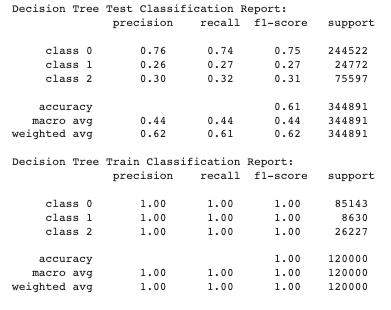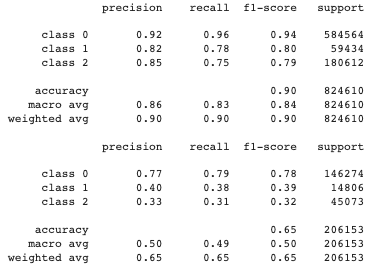
9. As part of our experimentation, we explored various techniques for handling the year and zipcode variables, which are quasi-categorical. However, our analyses did not reveal any significant improvement in the performance of our models.

10. In our data preprocessing, we had the option to handle missing data by deleting the rows with null values. However, this approach could lead to a loss of valuable information and a decrease in the size of the dataset, which could affect the performance of the model. When the percentage of null values is low, as in our case where it was less than 2% of the training data, we though it would be a better approach to impute. We imputed the null values with appropriate measures like mean, median, or mode to help retain the maximum amount of information while still accounting for missing data.

# Conclusion
1. The dataset has around 1% missing data in the training set. However, there are columns which contains unrealistic data. For example, age of policy holder was incorrect in many cases. In order the keep those data, we had impute those rows. Given the small data for class 1 and 2, these imputed values can affect the model accuracy. If these imputed values corresponds to those classes it could made it difficult for the model.

2. Similar to age data, we also imputed binary/categorical data. Which can equally affect the model's capability to predict accurately.

3. For our models, we did not apply one hot encoder. Therefore, all the categorical variables were treated by the model as ordinal variable. We probably needed more domain knowledge to determine which variables we should consider as ordinal.

4. For imputation, we had used mode for categorical data. There are other imputation techniques which can be used to check if they improve the model.

5. In our experience, implementing machine learning in Pyspark can be challenging, especially when it comes to interpreting the model. The need to use a Vector Assembler to combine the features into a single column can make it difficult to understand the contribution of each feature to the final model. Furthermore, building a robust model often requires multiple transformations, such as encoding categorical variables and imputing missing values. There is definetly a learning curve and building the right model requires exploration and finetuning.

# Appendix

## Modeling Iterations: Exploratory Models

### Multilayer Perceptron Classifier- Limited Memory BFGS Solver

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

input_col = "features"
output_col = "cancel"

layers = [train_df.schema[input_col].metadata["ml_attr"]["num_attrs"], 10, 10, 3]
solver = "l-bfgs"  # limited-memory BFGS solver

mlp = MultilayerPerceptronClassifier(labelCol=output_col, featuresCol=input_col, maxIter=100, layers=layers, solver=solver, blockSize=128, seed=1234)
mlp_model = mlp.fit(train_df)

mlp_predictions = mlp_model.transform(test_df)

evaluator = MulticlassClassificationEvaluator(labelCol=output_col, predictionCol="prediction", metricName="accuracy")
mlp_accuracy = evaluator.evaluate(mlp_predictions)

print('Multilayer Perceptron Accuracy:', mlp_accuracy)


Multilayer Perceptron Accuracy: 0.7089834179494391


### Multilayer Perceptron Classifier

In [ ]:
layers = [train_df.schema[input_col].metadata["ml_attr"]["num_attrs"], 10, 5, 3]

mlp = MultilayerPerceptronClassifier(labelCol=output_col, featuresCol=input_col, maxIter=100, layers=layers, blockSize=128, seed=1234)
mlp_model = mlp.fit(train_df)

mlp_predictions = mlp_model.transform(test_df)

evaluator = MulticlassClassificationEvaluator(labelCol=output_col, predictionCol="prediction", metricName="accuracy")
mlp_accuracy = evaluator.evaluate(mlp_predictions)

print('Multilayer Perceptron Accuracy:', mlp_accuracy)

Multilayer Perceptron Accuracy: 0.7089834179494391


### Random Forest Classifier

In [ ]:
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the input column and the output column
input_col = "features"
output_col = "cancel"

# Create a random forest classifier and fit it to the train data
rf = RandomForestClassifier(labelCol=output_col, featuresCol=input_col)
rf_model = rf.fit(train_df)

# Make predictions on the train and test data using the trained random forest model
rf_train_predictions = rf_model.transform(train_df)
rf_test_predictions = rf_model.transform(test_df)

# Evaluate the performance of the models using a multi-class classification evaluator
evaluator = MulticlassClassificationEvaluator(labelCol=output_col, metricName="accuracy")
rf_train_accuracy = evaluator.evaluate(rf_train_predictions)
rf_test_accuracy = evaluator.evaluate(rf_test_predictions)

print('Random Forest Train Accuracy:', rf_train_accuracy)
print('Random Forest Test Accuracy:', rf_test_accuracy)

Random Forest Train Accuracy: 0.7112166666666667
Random Forest Test Accuracy: 0.7103751620077068


In [ ]:
from sklearn.metrics import classification_report


y_pred_rf = [p.prediction for p in rf_test_predictions.select("prediction").collect()]
y_actual_rf = [p.cancel for p in rf_test_predictions.select("cancel").collect()]

y_pred_rf_tr = [p.prediction for p in rf_train_predictions.select("prediction").collect()]
y_actual_rf_tr = [p.cancel for p in rf_train_predictions.select("cancel").collect()]

print('Random Forest Test Classification Report:\n', classification_report(y_actual_rf, y_pred_rf, target_names=["class 0","class 1","class 2"], zero_division=0))

print('Random Forest Train Classification Report:\n', classification_report(y_actual_rf_tr, y_pred_rf_tr, target_names=["class 0","class 1","class 2"], zero_division=0))

Random Forest Test Classification Report:
               precision    recall  f1-score   support

     class 0       0.71      1.00      0.83    244522
     class 1       0.00      0.00      0.00     24772
     class 2       0.73      0.01      0.02     75597

    accuracy                           0.71    344891
   macro avg       0.48      0.34      0.28    344891
weighted avg       0.66      0.71      0.59    344891

Random Forest Train Classification Report:
               precision    recall  f1-score   support

     class 0       0.71      1.00      0.83     85143
     class 1       0.00      0.00      0.00      8630
     class 2       0.74      0.01      0.02     26227

    accuracy                           0.71    120000
   macro avg       0.48      0.34      0.28    120000
weighted avg       0.67      0.71      0.59    120000



In [ ]:
from sklearn.metrics import f1_score, classification_report
y_pred = [p.prediction for p in lr_test_predictions.select("prediction").collect()]
y_actual = [p.cancel for p in lr_test_predictions.select("cancel").collect()]

print(classification_report(y_actual,y_pred, target_names=["class 0","class 1","class 2"], zero_division=0))

              precision    recall  f1-score   support

     class 0       0.73      0.95      0.83    244522
     class 1       0.00      0.00      0.00     24772
     class 2       0.54      0.19      0.28     75597

    accuracy                           0.72    344891
   macro avg       0.42      0.38      0.37    344891
weighted avg       0.64      0.72      0.65    344891



In [ ]:
y_pred = [p.prediction for p in lr_train_predictions.select("prediction").collect()]
y_actual = [p.cancel for p in lr_train_predictions.select("cancel").collect()]

print(classification_report(y_actual,y_pred, target_names=["class 0","class 1","class 2"], zero_division=0))

              precision    recall  f1-score   support

     class 0       0.73      0.96      0.83     85143
     class 1       0.00      0.00      0.00      8630
     class 2       0.55      0.19      0.28     26227

    accuracy                           0.72    120000
   macro avg       0.43      0.38      0.37    120000
weighted avg       0.64      0.72      0.65    120000



###Decision Tree Classifier

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the input column and the output column
input_col = "features"
output_col = "cancel"

# Create a decision tree classifier with a max depth of 30 and fit it to the train data
dt = DecisionTreeClassifier(labelCol=output_col, featuresCol=input_col, maxDepth=30)
dt_model = dt.fit(train_df)

# Make predictions on the train and test data using the trained decision tree model
dt_train_predictions = dt_model.transform(train_df)
dt_test_predictions = dt_model.transform(test_df)

# Evaluate the performance of the models using a multi-class classification evaluator
evaluator = MulticlassClassificationEvaluator(labelCol=output_col, metricName="accuracy")
dt_train_accuracy = evaluator.evaluate(dt_train_predictions)
dt_test_accuracy = evaluator.evaluate(dt_test_predictions)

print('Decision Tree Train Accuracy:', dt_train_accuracy)
print('Decision Tree Test Accuracy:', dt_test_accuracy)


Decision Tree Train Accuracy: 0.999825
Decision Tree Test Accuracy: 0.6126892264512556


In [ ]:
y_pred_rf = [p.prediction for p in dt_test_predictions.select("prediction").collect()]
y_actual_rf = [p.cancel for p in dt_test_predictions.select("cancel").collect()]

y_pred_rf_tr = [p.prediction for p in dt_train_predictions.select("prediction").collect()]
y_actual_rf_tr = [p.cancel for p in dt_train_predictions.select("cancel").collect()]

print('Decision Tree Test Classification Report:\n', classification_report(y_actual_rf, y_pred_rf, target_names=["class 0","class 1","class 2"], zero_division=0))

print('Decision Tree Train Classification Report:\n', classification_report(y_actual_rf_tr, y_pred_rf_tr, target_names=["class 0","class 1","class 2"], zero_division=0))

Decision Tree Test Classification Report:
               precision    recall  f1-score   support

     class 0       0.76      0.74      0.75    244522
     class 1       0.26      0.27      0.27     24772
     class 2       0.30      0.32      0.31     75597

    accuracy                           0.61    344891
   macro avg       0.44      0.44      0.44    344891
weighted avg       0.62      0.61      0.62    344891

Decision Tree Train Classification Report:
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     85143
     class 1       1.00      1.00      1.00      8630
     class 2       1.00      1.00      1.00     26227

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

